In [6]:
#Import all packages required
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
get_ipython().magic(u'matplotlib inline')
import sklearn
from sklearn import datasets,linear_model,metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression as lr
from sklearn.linear_model import LinearRegression as lm
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

### Descriptive Statistics

In [3]:
#Load the Boston dataset
from sklearn.datasets import load_boston
print(load_boston().DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [10]:
data=pd.DataFrame(load_boston().data, columns=load_boston().feature_names)

.target is the column that holds the price variable also called MEDV-from the description above.

In [16]:
price=load_boston().target
data['MEDV']=price
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [17]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Seperating out the houses 

### For houses Along the River


In [18]:
along_river = data[data['CHAS'] == 1]
print(" Total number of houses near the river Charles are ", len(along_river))

(' Total number of houses near the river Charles are ', 35)


In [22]:
along_river.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
142,3.32105,0.0,19.58,1.0,0.871,5.403,100.0,1.3216,5.0,403.0,14.7,396.90,26.82,13.4
152,1.12658,0.0,19.58,1.0,0.871,5.012,88.0,1.6102,5.0,403.0,14.7,343.28,12.12,15.3
154,1.41385,0.0,19.58,1.0,0.871,6.129,96.0,1.7494,5.0,403.0,14.7,321.02,15.12,17.0
155,3.53501,0.0,19.58,1.0,0.871,6.152,82.6,1.7455,5.0,403.0,14.7,88.01,15.02,15.6
160,1.27346,0.0,19.58,1.0,0.605,6.250,92.6,1.7984,5.0,403.0,14.7,338.92,5.50,27.0


## For houses Away from the River

In [19]:
away_river = data[data['CHAS'] == 0]
print(" Total number of houses away from river Charles are ", len(away_river))

(' Total number of houses away from river Charles are ', 471)


In [23]:
away_river.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Text(0,0.5,'Price')

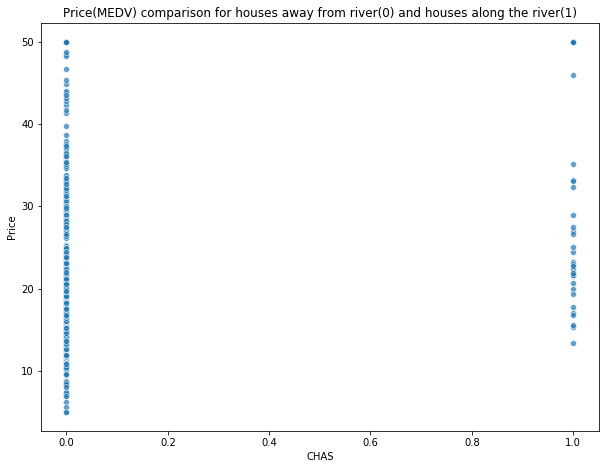

In [24]:
# No Correlation
fig = plt.figure(figsize=(10,7.5))
ax = sns.scatterplot(data['CHAS'], data['MEDV'], edgecolors='w', alpha=0.7)
ax.set_title('Price(MEDV) comparison for houses away from river(0) and houses along the river(1)')
ax.set_xlabel('CHAS')
ax.set_ylabel('Price')

In [9]:
print("Maximum price for houses away from river = ", max(away_river['MEDV']))
print("Minimum price for houses away from river = ", min(away_river['MEDV']))

print("Maximum price for houses along the river = ", max(along_river['MEDV']))
print("Minimum price for houses along the river = ", min(along_river['MEDV']))

('Maximum price for houses away from river = ', 50.0)
('Minimum price for houses away from river = ', 5.0)
('Maximum price for houses along the river = ', 50.0)
('Minimum price for houses along the river = ', 13.4)


## Observation

1. There are 436,(86%) more houses away from the river than along the river, 471 v 35 or 93% v 7%.  
2. The price for houses away from the river are more evenly spread i.e uniform price.
3. Houses along the river have a higher, lower bound. The max price for both are similar. Conversely, there are more houses away from the river which have lower price range.

## Exploratory analysis of the dataset Overall

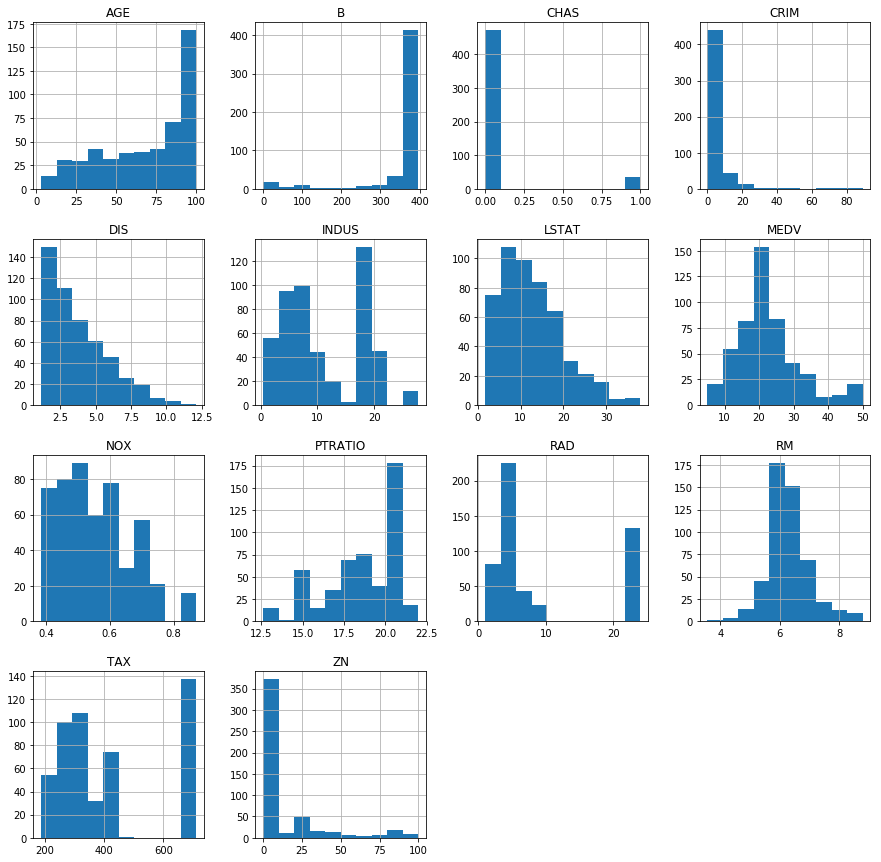

In [36]:
data.hist(figsize=(15,15))
plt.show()

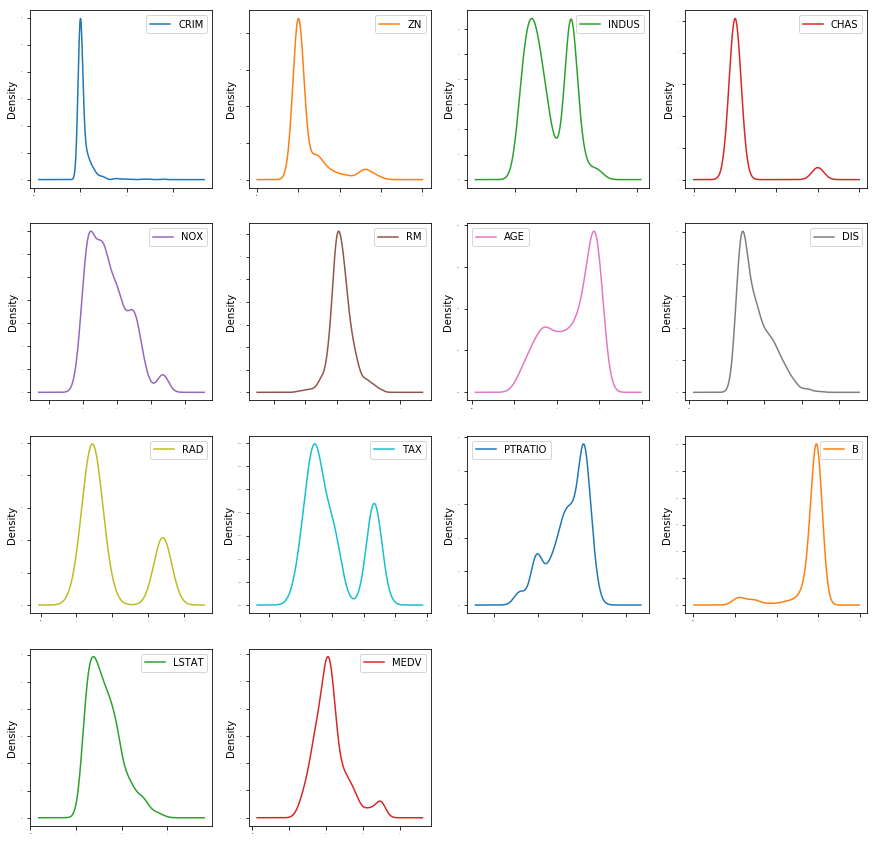

In [39]:
data.plot(kind='density', subplots=True, layout=(4,4), sharex=False, legend=True, fontsize=1, figsize=(15,15))
plt.show()

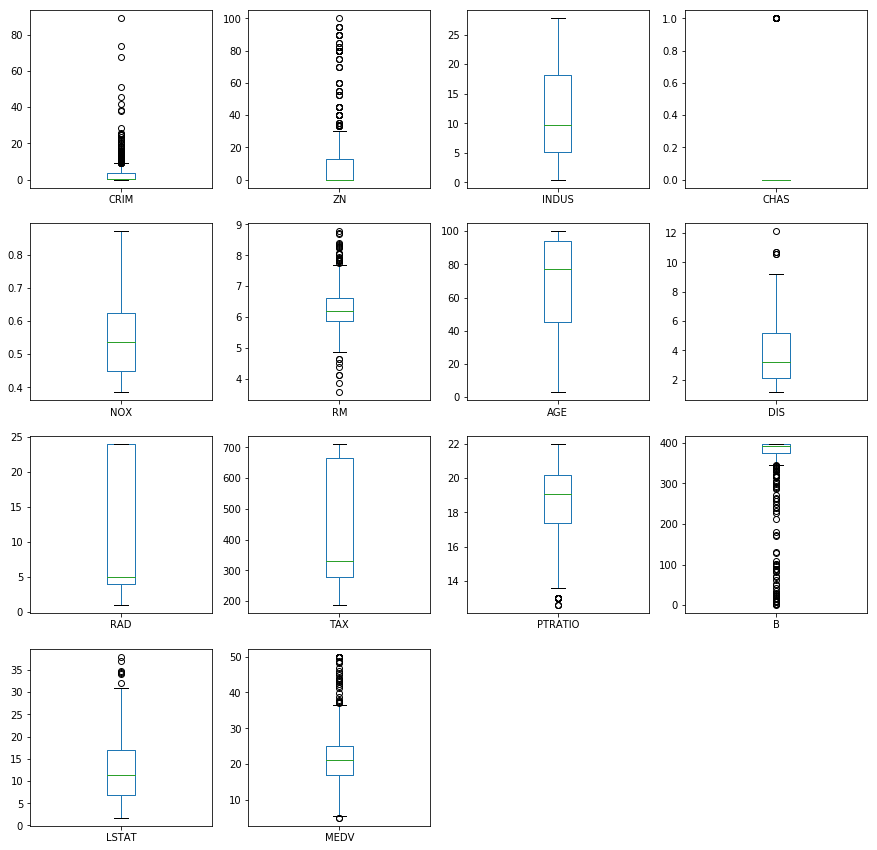

In [40]:
data.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, legend=True, fontsize=10, figsize=(15,15))
plt.show()

### Analysis of results

#### CRIM Represents the per capita crime rate by town
The dataset is shewed and makes it difficult to interpret the boxplot.
Overall, the crime rate per capita is under 10.
Most of the data occurs below the 40 range with outliers in the range 40 to 80.

#### ZN Represents proportion of residential land zoned for lots of over 25,000 sq. ft
The dataset is right skewed with the lower bounds being extemly low. 
Data which is right skewed is usually because of a lower boundary in a data set.
A higher proportion of land is zoned for lands over 20,000 sq. ft. 
REF https://blog.prepscholar.com/skewed-right

#### INDUS Represents the proportion of non-retail business acres per town
The density chart shows 2 maximums for the dataset. 
The boxplot shows that the data is distributedmore betwen quartile 3 and 4.
Therefore the proportion of non-retail busines acres per town is relatiely higher.

#### CHAS Represents proximity to the Charles River, 1 denoting close, otherwise 0.
The density chart shows that more houses are away from the river than close to it.
The boxplot shows maximum numbers of houses away from the river, at zero plus there are some houses close to the river.

#### NOX Represents nitrogen oxides concentration (parts per million)
The dataset is right skewed with the lower bounds being extemely low. 
Data which is right skewed is usually because of a lower boundary in a data set.
A higher proportion of NOX exists in the lower bounds of the data. 

#### RM Represents average number of rooms per dwelling
The density chart shows that the average number of rooms per dwelling follows normal distribution and that approximately 6 - 6.5 is the average number of rooms per dwelling for the overall dataset.
However, there are lower and higher number of rooms which represent outliers which shows the lower average number of rooms range from approximately 3 - 4.5. The outlier higher average number of rooms range from approximaely 7.8 to 9.0

#### AGE Represents proportion of owner occupied units built prior to 1940
The density chart shows that the dataset is left skewed with the lower bounds being extemely low. 
Left skewed distribution is also refered to as negatively skewed distribution as the long tail is on the negative path on a number line.
The majority of data points are in the range 40 to low 90s.
REF https://blog.prepscholar.com/skewed-right

#### DIS Represents weighted mean of distances to five Boston employment centres
The dataset is right skewed with the lower bounds being extemely low. 
A higher proportion of DIS exists in the lower bounds of the data and the mean and therefore closer to the employment centers. 
There are outliers in the 10-12 bound for weighted mean of distances.

#### RAD Represents index of accessibility to radial highways
The density chart shows that the dataset has more in the lower range than the higher range. 
The boxplot shows that there are no outliers and that there is more data in 3rd and 4th quartiles.

#### TAX Represents full-value property tax rate per \$10,000
The density chart shows that the dataset has more in the lower range than the higher range. 
The boxplot shows that there are no outliers and that there is more data in 3rd and 4th quartiles.

#### PTRATIO Represents pupil-teacher ratio by town
The density chart shows that the dataset is left skewed with the lower bounds being extemely low. 
Overall the range of pupil-teacher ratio is between 13 - 22.
The highest concentraion ocurs between 17 and 20.
There are also outliers in the range below approximately 14.

#### BLACK Represents 1,000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.
with a highest proportion occurs at house prices up to $400,000 and is mostly evenly distributed in that range.  
There are no Black in towns where the house proces are higher than \$400,000

#### LSTAT Represents lower status of the population(per cent)
The data distribution is close to normal but is right skewed with the lower bounds being extemly low. 
There are outliers are beyond 30. 
Overall the range of the dataset is between 2 to 30.


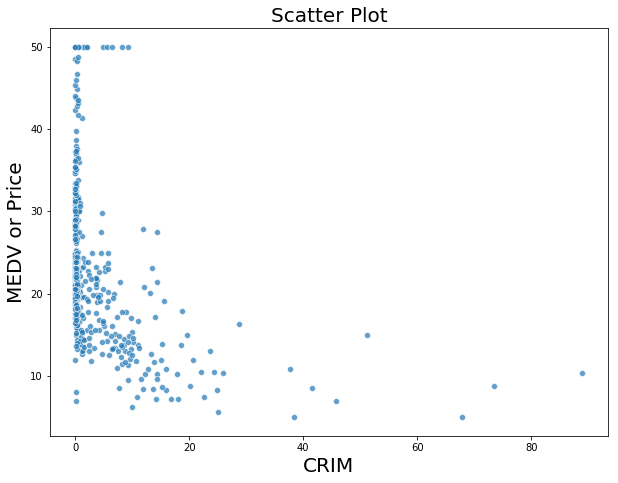

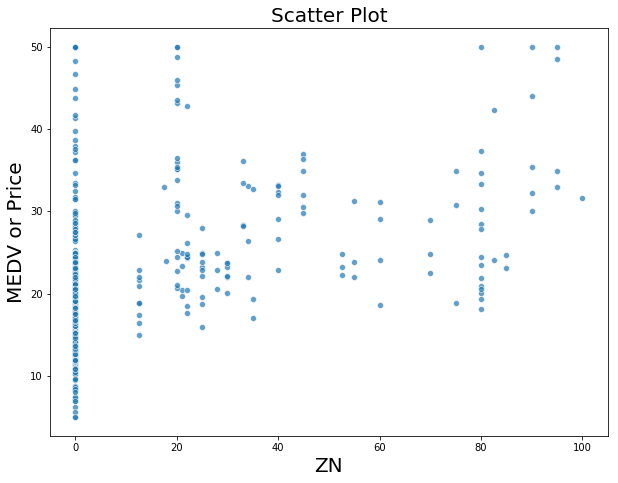

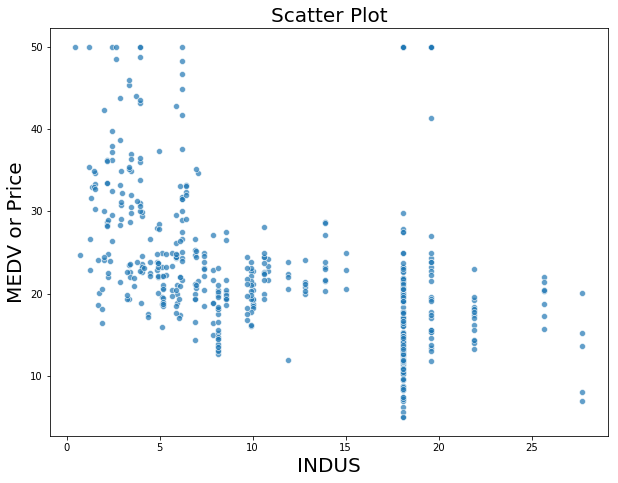

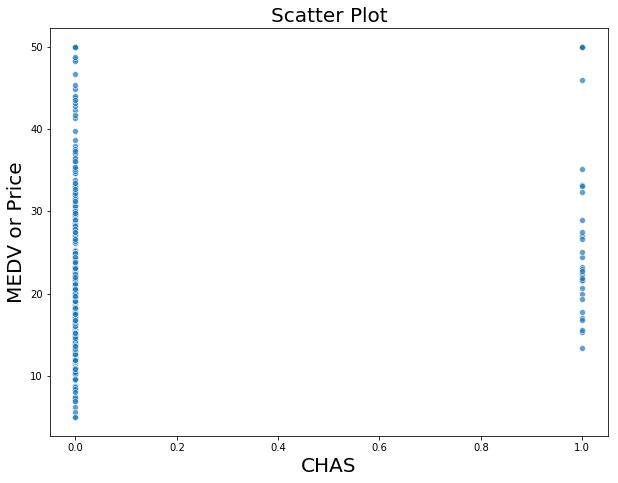

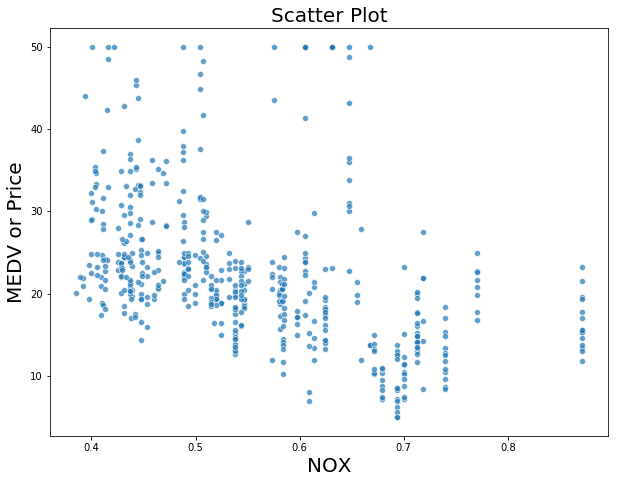

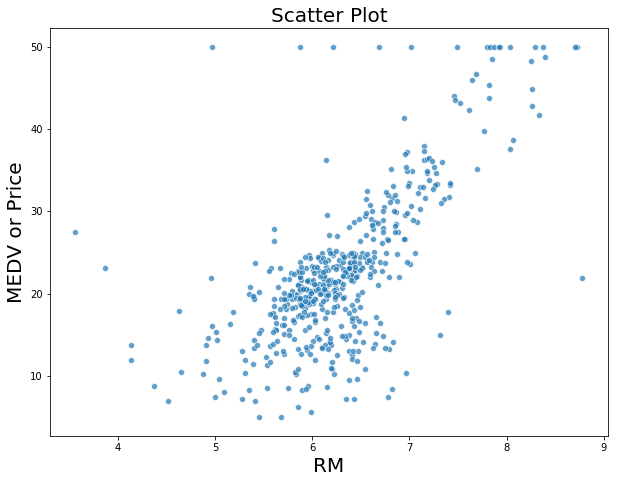

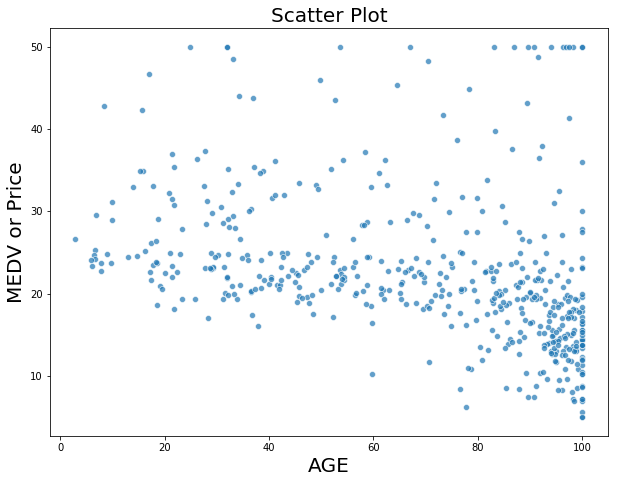

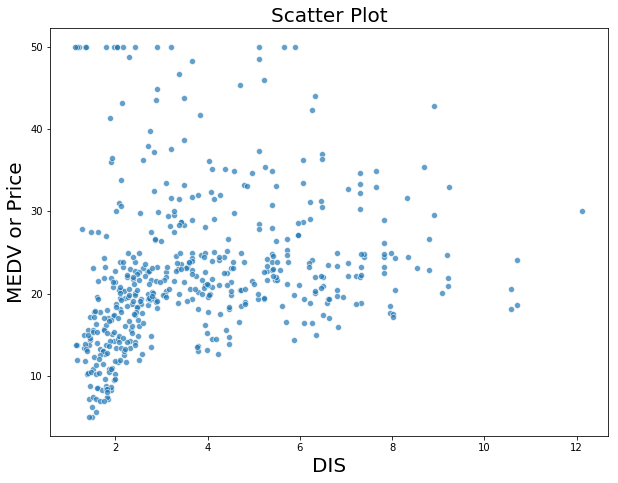

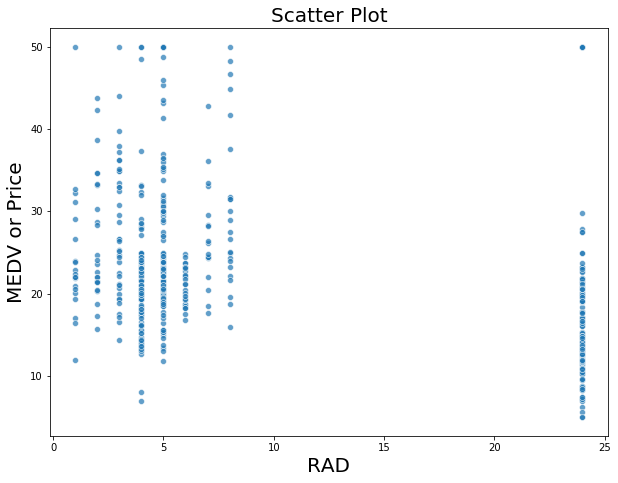

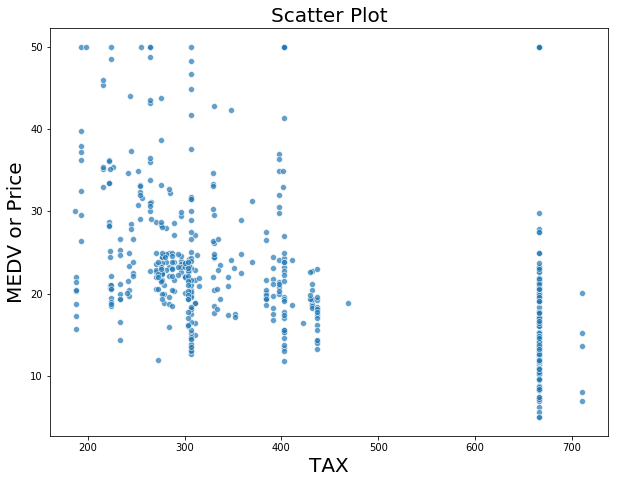

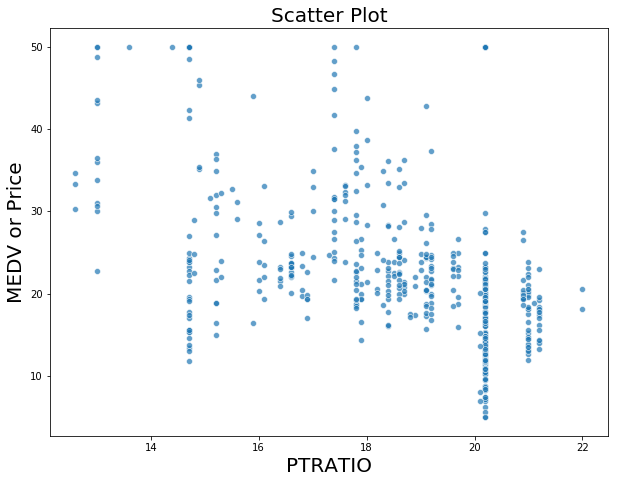

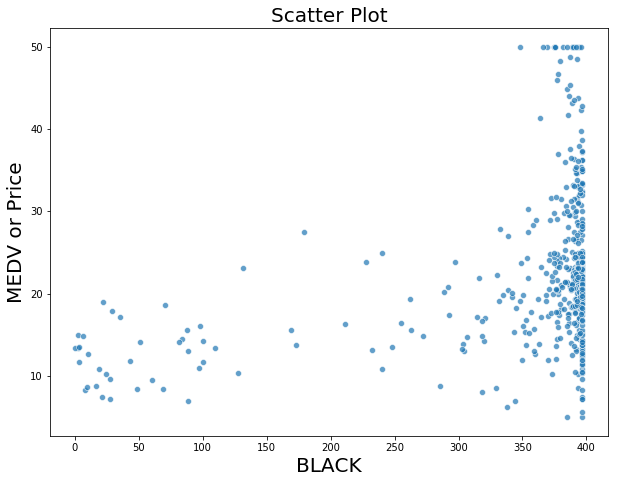

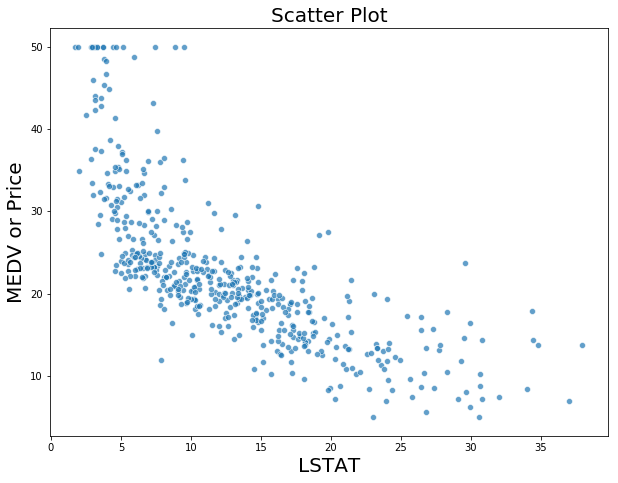

In [16]:
# RM and LSTAT have high correlation with MEDV.

column = len(data.columns)

for x in range(column-1):
    fig = plt.figure(figsize=(10,7.5))
    ax = sns.scatterplot(data.iloc[:,x], data['MEDV'], edgecolors='w', alpha=0.7)
    ax.set_title('Scatter Plot', fontsize=20)
    ax.set_xlabel(str(data.columns[x]), fontsize=20)
    ax.set_ylabel('MEDV or Price', fontsize=20)

### Analysis of Scatter plots.

Scatter plots will be explained for linearity, slope and strength.
 - Linearity describesif the data is in a straight line (linear) or curved (non linear)
 - Slope describes the direction of the variable along the x axis in relation to the y axis. The y axis for all the scatter plots is the MEDV or house price. When the direction of y increases in line with x this is a positive relatiosnhip. When the opposite occurs, then this is a negative relationship
  - Strength desribes the amount of scatter in the plot. When they are spread widely, then the relationship is weak whereas when the dots are on a line then the relationship is strong. 


https://stattrek.com/statistics/charts/scatterplot.aspx


###### (1) MEDV or Price and CRIM:
The scatter plot suggests a strong relation between MEDV and CRIM where there are low crime rates at all house prices. However, the relationship is non linear.  

###### (2) MEDV or Price and ZN:
The scatter plot suggests the relation between MEDV and ZN is non linear with zero slope and that the relationship between house price and proportion of residential land owned is weak.

###### (3) MEDV or Price and INDUS:
The scatter plot suggests the relation between MEDV and INDUS behaves differently for proportion of non retail business acres per town less than 15 and over 15. For less than 15 acres, the relation is non linear, has zero slope and is weak. For over 15 acres the relation is linear, has positive slope and is weak. However, when describing the scatter plot overall, there is no relationship.

###### (4) MEDV or Price and CHAS:
The scatter plot suggests the relation between MEDV and CHAS is linear, has zero slope (? not sure cos its straight?) and is strong for each of the 2 variables, 1 and 0 where 1 denotes promity to the Charles river and 0 denotes no proximity. There are gaps on nthe scatter plot as there are no values inbetween for CHAS, its either 1 or 0, not a range. 

###### (5) MEDV or Price and NOX:
The scatter plot suggests the relation between MEDV and NOX is non linear, has zero slope and is weak. There are gaps in the data and also outliers. Therefore no direct correlation between house price and nitrogen oxide concentration.

###### (6) MEDV or Price and RM:
The scatter plot suggests the relation between MEDV and RM is linear, has a positive slope clusters in the 5 to 7 average number of rooms. There are also outliers. 

###### (7) MEDV or Price and AGE:
The scatter plot suggests the relation between MEDV and AGE is non linear, has a negative slope with clusters at 100, the proportion of owner-occupied units built prior to 1940 compared to house prices.

###### (8) MEDV or Price and DIS:
The scatter plot suggests the relation between MEDV and DIS is non linear, has clusters in the 0 - 3 weighted mean of distances to five Boston employment centres. There are also outliers. Overall there is no direct correltation.

###### (9) MEDV or Price and RAD:
The scatter plot suggests the relation between MEDV and RAD is linear, with gaps between approimately 10 - 22 in the index of accessibility to radial highways. Overall, there is a direct correlation between house prices and accessibility to highways.

###### (10) MEDV or Price and TAX:
The scatter plot suggests the relation between MEDV and TAX is non linear, has gaps in the \$500 to \$600 tax range.There are also outlier. Overall, there is no correlation between house prices and the full value property tax rate per \$10,000.

######(11) MEDV or Price and PTRATIO:
The scatter plot suggests the relation between MEDV and PTRATIO is non linear, has zero slope and is weak. There are outliers at less than 14 pupil-teacher ratio and also at 22. At just over 20 of a ratio, there is a linear relationship but overall there is no direct correlation.

######(12)MEDV or Price and BLACK:
The scatter plot suggests the relation between MEDV and BLACK is non linear with clusters at 400 mark (? not sure whats the rigth word for this). There are outliers at the lower level. Therefore overall, there is no direct correlation between house prices and the proportion of blacks per town.

######(12)MEDV or Price and LSTAT:
The scatter plot suggests the relation between MEDV and LSTAT is linear, has a negative slope and is strong with outliers.Overall there is a direct correlation between house prices and the lower status of the population(per cent).





### 3.0 References
- 1.https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155
 - 2. https://www.dummies.com/education/math/statistics/how-to-interpret-a-scatterplot/